In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
#import for stock data visaulization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import for reading from yahoo fin
from pandas_datareader import data
from datetime import datetime

In [4]:
#define stocks to be used for data analysis
stock_list = ['AAPL', 'AMZN', 'MSFT', 'GOOG']
#start and end date for fetching data
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)
for stock_symbol in stock_list:
    globals() [stock_symbol] = data.DataReader(stock_symbol, 'yahoo', start , end)

In [9]:
AAPL.shape

(252, 6)

In [10]:
AAPL.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

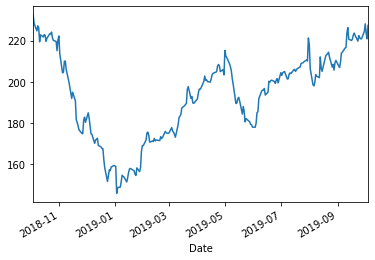

In [11]:
AAPL.High.plot()

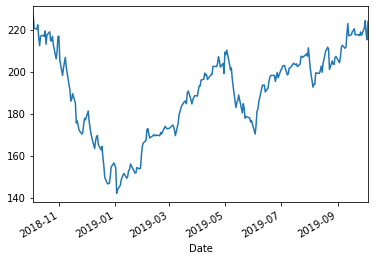

In [12]:
AAPL.Low.plot()

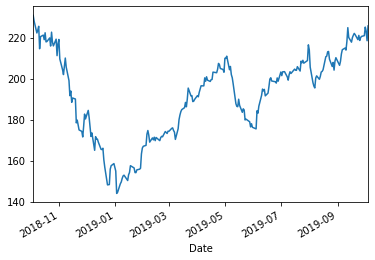

In [13]:
AAPL.Open.plot()

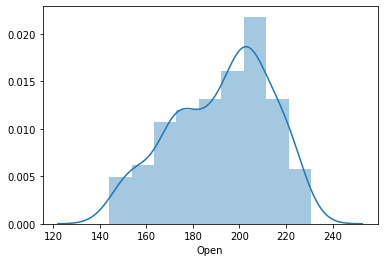

In [14]:
sns.distplot(AAPL.Open)

In [7]:
stock_list = ['AAPL', 'AMZN', 'MSFT', 'GOOG']
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)
stocksData = []
for stock_symbol in stock_list:
    stockData = data.DataReader(stock_symbol, 'yahoo', start , end)
    stocksData.append(stockData)

In [6]:
stocksData[0].describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,191.792789,188.070199,189.923785,190.026614,3.221903e+07,188.745400
std,21.766925,21.483611,21.606058,21.606972,1.420980e+07,21.292771
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.582779
25%,174.974998,172.225006,173.790001,174.235001,2.263160e+07,173.495911
50%,190.080002,187.449997,188.949997,188.589996,2.840280e+07,187.189621
75%,209.375000,205.784996,207.320000,207.760002,3.856335e+07,205.900421
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


In [15]:
#view summary stocks of Apple
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,194.176707,190.138016,192.162341,192.185278,3.219537e+07,190.831922
std,21.005105,20.759625,20.906835,20.843918,1.342996e+07,21.011112
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.505798
25%,175.967499,173.747501,174.872501,174.832497,2.228210e+07,173.452965
50%,199.055000,193.930000,196.434998,197.000000,2.904540e+07,195.877899
75%,209.260006,205.594994,207.717499,207.912502,3.876472e+07,206.560455
max,232.350006,226.729996,230.779999,227.990005,9.574460e+07,227.009995


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-10-04 to 2019-10-04
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


In [6]:
import pandas as pd
#create a pandas DataFrame for AAPL stock
AAPL_ds = pd.DataFrame(AAPL['Adj Close'])

In [7]:
AAPL_ds.shape

(252, 1)

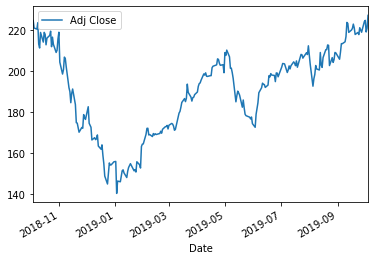

In [8]:
AAPL_ds.plot()

In [15]:
aapl_arr = AAPL_ds.iloc[:,0].values

In [14]:
aapl_arr.shape

(251,)

In [15]:
aapl_arr[0]

162.7615966796875

In [23]:
import numpy as np
def next_batch(batch_size,num_steps):
    x_batch = np.zeros((batch_size,num_steps))
    y_batch = np.zeros((batch_size,num_steps))
    
    for i in range(batch_size):
        stindex = np.random.randint(0,250-num_steps-1)
        #print(stindex)
        endindex = stindex + num_steps
        x_batch[i] = aapl_arr[stindex: stindex + num_steps]
        y_batch[i] = aapl_arr[stindex+1: stindex+num_steps+1]
    return x_batch, y_batch


In [24]:
x_batch, y_batch  = next_batch(10,20)

In [25]:
x_batch.shape, y_batch.shape

((10, 20), (10, 20))

In [26]:
x_batch[1]

array([156.15031433, 152.64533997, 153.26268005, 152.04789734,
       157.08628845, 155.63252258, 154.0194397 , 164.54429626,
       165.72921753, 165.80888367, 170.51867676, 173.43615723,
       173.49591064, 170.21000671, 170.41000366, 169.42999268,
       170.88999939, 170.17999268, 170.80000305, 170.41999817])

In [27]:
y_batch[1]

array([152.64533997, 153.26268005, 152.04789734, 157.08628845,
       155.63252258, 154.0194397 , 164.54429626, 165.72921753,
       165.80888367, 170.51867676, 173.43615723, 173.49591064,
       170.21000671, 170.41000366, 169.42999268, 170.88999939,
       170.17999268, 170.80000305, 170.41999817, 170.92999268])

In [28]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [30]:
import tensorflow as tf
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [31]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)

In [32]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [33]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [34]:
saver = tf.train.Saver()
n_iterations = 1000
batch_size = 15

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        X_batch = X_batch.reshape(batch_size,n_steps,1)
        y_batch = y_batch.reshape(batch_size,n_steps,1)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./my_stock_series_model") # not shown in the content

0 	MSE: 25385.668
100 	MSE: 496.1222
200 	MSE: 75.03731
300 	MSE: 12.157332
400 	MSE: 7.552589
500 	MSE: 13.012306
600 	MSE: 10.334614
700 	MSE: 10.508787
800 	MSE: 9.636517
900 	MSE: 14.005602


In [42]:
with tf.Session() as sess:                          # not shown in the content
    saver.restore(sess, "./my_stock_series_model")   # not shown

    X_new = aapl_arr[70:90]
    X_new = X_new.reshape(1,20,1)
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    y_true= aapl_arr[71:91]
    print(y_pred)

INFO:tensorflow:Restoring parameters from ./my_stock_series_model
[[[207.19853]
  [208.127  ]
  [207.51573]
  [210.51843]
  [215.2449 ]
  [213.76685]
  [212.81606]
  [213.02956]
  [213.96556]
  [214.40015]
  [215.80617]
  [217.17198]
  [220.39981]
  [222.33714]
  [225.12215]
  [226.06789]
  [225.19188]
  [221.90247]
  [220.15521]
  [217.55885]]]


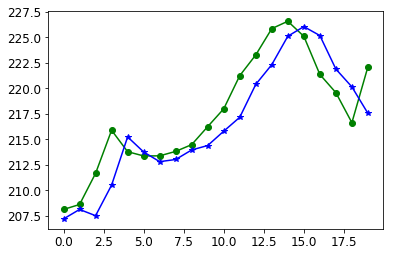

In [44]:
plt.plot(y_true, marker="o", color="green")
plt.plot(y_pred.ravel(), marker="*", color="blue")

In [11]:
#View First 5 records
AAPL_ds.head()

,Adj Close
Date,
2018-01-16,173.583969
2018-01-17,176.450928
2018-01-18,176.608551
2018-01-19,175.820389
2018-01-22,174.381973


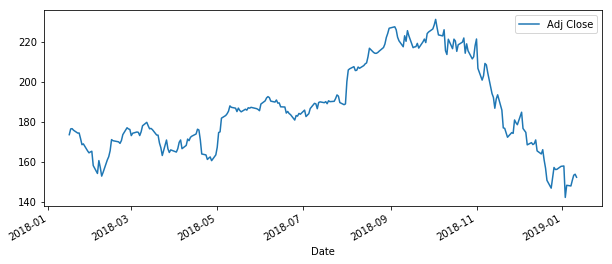

In [12]:
AAPL_ds.plot(legend=True, figsize=(10,4))

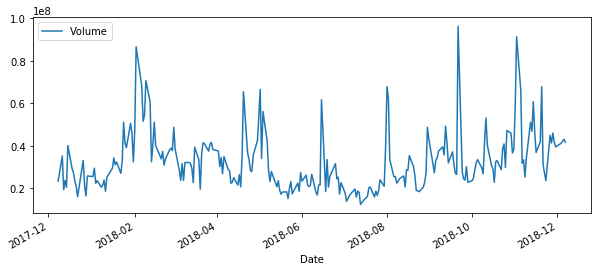

In [44]:
#view volume of stock traded every day
AAPL['Volume'].plot(legend=True, figsize=(10,4))

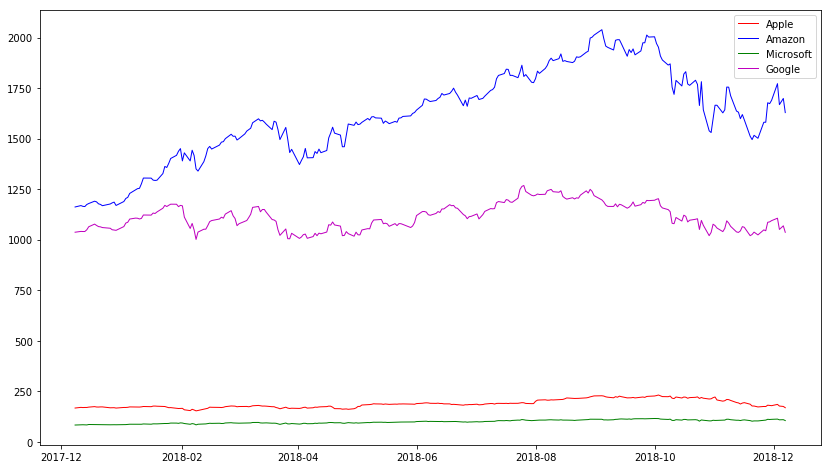

In [45]:
#plot all stock performances  on Adj close for entire year
plt.figure(figsize=(14,8))
plt.plot(AAPL['Adj Close'], 'r', label='Apple', linewidth=1)
plt.plot(AMZN['Adj Close'], 'b', label='Amazon', linewidth=1)
plt.plot(MSFT['Adj Close'], 'g', label='Microsoft', linewidth=1)
plt.plot(GOOG['Adj Close'], 'm', label='Google', linewidth=1)
plt.legend()
plt.show()

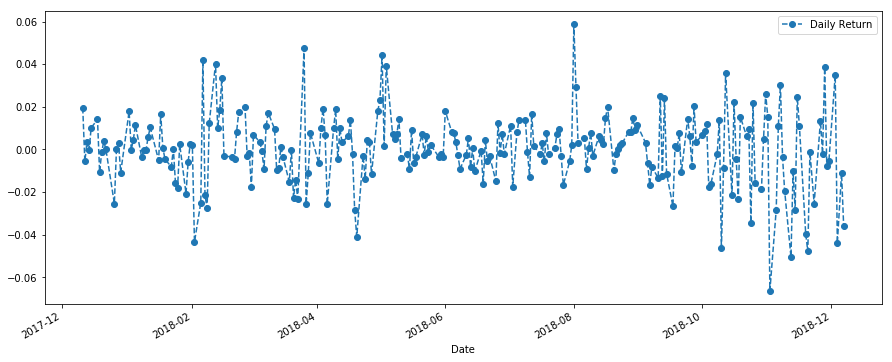

In [17]:
#computing pc chnage
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,6), legend=True, linestyle='--', marker='o')

In [24]:
#Fetch closing prices
closing_price_stock = data.DataReader(['AAPL', 'AMZN', 'MSFT', 'GOOG'], 'yahoo', start , end)['Adj Close']

In [25]:
closing_price_stock.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-14,169.672668,1174.260010,1049.150024,83.248863
2017-12-15,171.396790,1179.140015,1064.189941,85.372101
2017-12-18,173.810547,1190.579956,1077.140015,84.910088
2017-12-19,171.958359,1187.380005,1070.680054,84.369461
2017-12-20,171.771179,1177.619995,1064.949951,84.064720


In [27]:
stock_returns = closing_price_stock.pct_change()

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


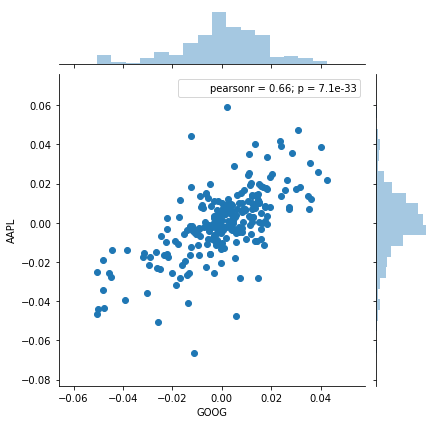

In [28]:
#compare daily returns of Google and Apple
sns.jointplot('GOOG', 'AAPL', stock_returns,kind='scatter')

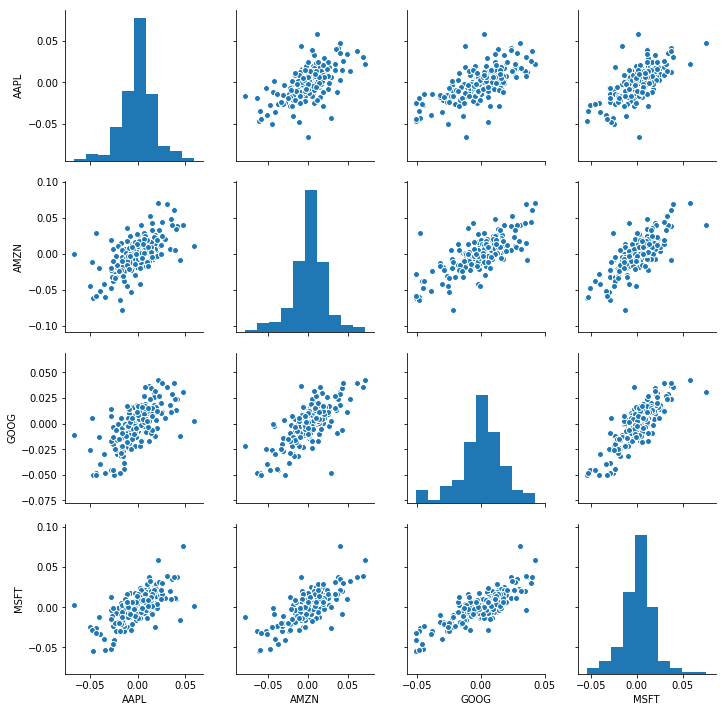

In [29]:
sns.pairplot(stock_returns.dropna())